# Masculinity Survey

In this project we will focus on clustering algorithms, notably KMeans. We'll use data from a masculinity survey
[FiveThirtyEight](https://fivethirtyeight.com/), which can be found in `masculinity-survey.pdf`.
The raw responses can be found in `masculinity.csv`.

### Imports

Our imports are pandas, matplotlib, and sklearns.

In [12]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans

Let's import the csv into a dataframe and take a look at the first few values.
We'll also see how long the dataset is and what the columns are.

In [13]:
survey = pd.read_csv('masculinity.csv')
print(f'The columns are:\n{survey.columns}')
print(f'The length of the set is:\n{len(survey)}')
print(survey['q0007_0001'].value_counts())
print(survey.head())

The columns are: Index(['Unnamed: 0', 'StartDate', 'EndDate', 'q0001', 'q0002', 'q0004_0001',
       'q0004_0002', 'q0004_0003', 'q0004_0004', 'q0004_0005', 'q0004_0006',
       'q0005', 'q0007_0001', 'q0007_0002', 'q0007_0003', 'q0007_0004',
       'q0007_0005', 'q0007_0006', 'q0007_0007', 'q0007_0008', 'q0007_0009',
       'q0007_0010', 'q0007_0011', 'q0008_0001', 'q0008_0002', 'q0008_0003',
       'q0008_0004', 'q0008_0005', 'q0008_0006', 'q0008_0007', 'q0008_0008',
       'q0008_0009', 'q0008_0010', 'q0008_0011', 'q0008_0012', 'q0009',
       'q0010_0001', 'q0010_0002', 'q0010_0003', 'q0010_0004', 'q0010_0005',
       'q0010_0006', 'q0010_0007', 'q0010_0008', 'q0011_0001', 'q0011_0002',
       'q0011_0003', 'q0011_0004', 'q0011_0005', 'q0012_0001', 'q0012_0002',
       'q0012_0003', 'q0012_0004', 'q0012_0005', 'q0012_0006', 'q0012_0007',
       'q0013', 'q0014', 'q0015', 'q0017', 'q0018', 'q0019_0001', 'q0019_0002',
       'q0019_0003', 'q0019_0004', 'q0019_0005', 'q0019_0006', 'q0

# Mapping the Data
For our KMeans Algorithm, we need to transform some of these responses
from ordinal to numerical data.
The answers to question 7 are a series of responses:
- 'Often'
- 'Sometimes'
- 'Rarely'
- 'Never, but open to it'
- 'Never, and not open to it'

We could perform similar mappings with question 28 (`racethn4`) and
question 29 (`educ4`).

In [14]:
# getting the sub-questions of question 7
cols_to_map = ["q0007_0001", "q0007_0002", "q0007_0003", "q0007_0004",
       "q0007_0005", "q0007_0006", "q0007_0007", "q0007_0008", "q0007_0009",
       "q0007_0010", "q0007_0011"]

# changing the answers to numerical responses
for col in cols_to_map:
	survey[col] = survey[col].map({'Often': 4,
	                               'Sometimes': 3,
	                               'Rarely': 2,
	                               'Never, but open to it': 1,
	                               'Never, and not open to it': 0})

# checking for success
print(survey['q0007_0001'].head())
print(survey['q0007_0001'].value_counts())

0    4.0
1    2.0
2    3.0
3    2.0
4    3.0
Name: q0007_0001, dtype: float64
3.0    537
2.0    324
4.0    142
1.0    123
0.0     53
Name: q0007_0001, dtype: int64


## Plotting the Data
Let's look at our features before putting them in the algorithm.
We'll compare question 7-1 and 7-2.

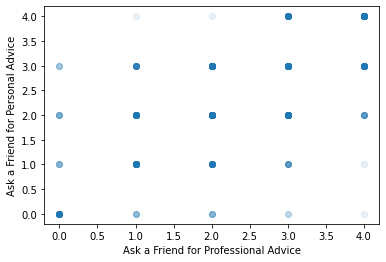

In [15]:
# graphing the values before k-means
plt.scatter(survey['q0007_0001'], survey['q0007_0002'], alpha=0.1)
plt.xlabel('Ask a Friend for Professional Advice')
plt.ylabel('Ask a Friend for Personal Advice')
plt.show()

## Building the Model

For question 7, the first four sub-questions are not traditionally seen as masculine:
- Ask a friend for professional advice
- Ask a friend for personal advice
- Express physical affection to male friends, like hugging, rubbing shoulders
- Cry

Whereas 7-5, 7-8, and 7-9 are usually viewed as masculine:
- Get in a physical fight with another person
- Watch sports of any kind
- Work out

Let's take these features (traditionally non-masculine vs masculine) and compare them with KMeans Clustering.

In [16]:
# dropping nan values
cols = ["q0007_0001", "q0007_0002", "q0007_0003", "q0007_0004",
       "q0007_0005", "q0007_0008", "q0007_0009"]
rows_to_cluster = survey.dropna(subset=cols)

# creating kmeans object
classifier = KMeans(n_clusters = 2)
classifier.fit(rows_to_cluster[["q0007_0001", "q0007_0002", "q0007_0003", "q0007_0004",
       "q0007_0005", "q0007_0008", "q0007_0009"]])

# showing the center of the cluster
print(classifier.cluster_centers_)

[[1.87830688 1.84391534 0.85185185 1.72486772 0.57142857 2.64021164
  1.97089947]
 [2.84548105 2.81632653 2.84110787 2.39941691 0.69387755 3.06997085
  2.90087464]]


## Separating the Clusters

A higher number indicates that a person was more likely to 'often'
Let's look at the labels of the set to see who fell into each cluster,
where each row is a person.

In [17]:
# showing the cluster labels and getting the indices of each
print(classifier.labels_)
cluster_zero_indices = []
cluster_one_indices = []

for i in range(len(classifier.labels_)):
	if classifier.labels_[i] == 0:
		cluster_zero_indices.append(i)
	elif classifier.labels_[i] == 1:
		cluster_one_indices.append(i)

print(cluster_zero_indices)

[1 0 1 ... 0 0 0]
[1, 4, 6, 7, 9, 10, 12, 14, 17, 18, 19, 24, 29, 35, 39, 42, 49, 51, 52, 53, 54, 55, 57, 58, 62, 63, 65, 66, 75, 78, 79, 82, 84, 86, 87, 88, 89, 90, 92, 94, 95, 97, 98, 101, 106, 107, 109, 113, 116, 117, 118, 119, 123, 128, 129, 130, 131, 132, 134, 139, 142, 143, 154, 172, 175, 176, 178, 179, 180, 181, 184, 187, 189, 195, 196, 198, 199, 201, 209, 212, 222, 229, 230, 231, 233, 236, 237, 240, 241, 247, 248, 249, 250, 256, 260, 261, 263, 264, 272, 275, 281, 283, 284, 286, 288, 291, 296, 297, 299, 300, 301, 305, 310, 311, 325, 328, 331, 336, 337, 340, 341, 343, 347, 350, 351, 353, 361, 367, 369, 377, 378, 390, 391, 392, 393, 394, 396, 397, 398, 399, 409, 410, 411, 412, 415, 417, 418, 419, 425, 428, 429, 432, 449, 454, 455, 457, 459, 461, 463, 468, 470, 471, 476, 477, 478, 484, 489, 490, 493, 494, 496, 498, 499, 502, 508, 509, 510, 515, 516, 521, 523, 525, 526, 529, 531, 533, 542, 546, 549, 555, 556, 559, 560, 562, 563, 564, 566, 567, 570, 577, 579, 580, 585, 588, 589, 592,

## Investigating the Clusters

Now that we have our indices and our clusters, we can determine where the
items (people) in each cluster would fall on other factors. For example, we
can now look at the ages of those each cluster and what education they have obtained.
It cam sometimes be beneficial to break these down by percentage, as the number
of members in each cluster can differ.

In [18]:
cluster_zero_df = rows_to_cluster.iloc[cluster_zero_indices]
cluster_one_df = rows_to_cluster.iloc[cluster_one_indices]

print('\nCluster Zero: Age Breakdown')
print(cluster_zero_df.age3.value_counts()/len(cluster_zero_df))
print('\nCluster Zero: Educational Attainment Breakdown')
print(cluster_zero_df.educ4.value_counts()/len(cluster_zero_df))
print('\nCluster One: Age Breakdown')
print(cluster_one_df.age3.value_counts()/len(cluster_one_df))
print('\nCluster One: Educational Attainment Breakdown')
print(cluster_one_df.educ4.value_counts()/len(cluster_one_df))


Cluster Zero: Age Breakdown
65 and up    0.502646
35 - 64      0.433862
18 - 34      0.060847
Name: age3, dtype: float64

Cluster Zero: Educational Attainment Breakdown
Some college            0.314815
College or more         0.285714
Post graduate degree    0.251323
High school or less     0.145503
Name: educ4, dtype: float64

Cluster One: Age Breakdown
35 - 64      0.478134
65 and up    0.454810
18 - 34      0.067055
Name: age3, dtype: float64

Cluster One: Educational Attainment Breakdown
Post graduate degree    0.365889
College or more         0.330904
Some college            0.230321
High school or less     0.072886
Name: educ4, dtype: float64


## Conclusion

In this project we were able to successfully differentiate respondents into clusters
and derive demographic information about them. In a similar vein, we could perform an analysis
on other parts of the set and use this data to build comprehensive predictive profiles based on
their other survey responses.

#### Data Sources
Data was provided by [FiveThirtyEight](https://fivethirtyeight.com/).